<a href="https://colab.research.google.com/github/Phatch1/040223305-Visualization-for-Data-Science/blob/main/Excercise5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

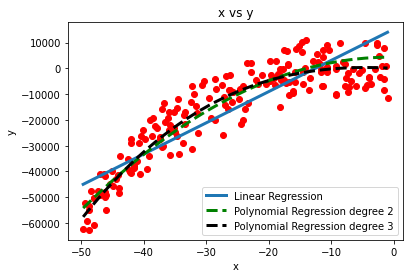

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#obtain data
url = 'https://raw.githubusercontent.com/sapichat/ML_Data_Shared/main/data_polylinreg.txt'
dataset = pd.read_csv(url,sep="\t")

x = np.array(dataset.iloc[:,0])
y = np.array(dataset.iloc[:,1])


#sort the data for matplotlib to plot, otherwise the line graph will connect the wrong point
x_sorted = np.sort(x).reshape(-1,1)
y_sorted = np.sort(y)

#fit + transform the data for polynomial regression
x_poly_2 = PolynomialFeatures(degree = 2,include_bias=False).fit_transform(x_sorted)
x_poly_3 = PolynomialFeatures(degree = 3,include_bias=False).fit_transform(x_sorted)
# print(x)
# print(x_2)

#fit the model
model = LinearRegression().fit(x_sorted,y_sorted)
model_poly1 = LinearRegression().fit(x_poly_2,y_sorted)
model_poly2 = LinearRegression(fit_intercept=False).fit(x_poly_3,y_sorted)

#predict
y_pred = model.predict(x_sorted)
y_pred_2 = model_poly1.predict(x_poly_2)
y_pred_3 = model_poly2.predict(x_poly_3)

#plot the graph
plt.scatter(x,y,c='red')
linear,= plt.plot(x_sorted,y_pred,linewidth=3)
poly1, = plt.plot(x_sorted,y_pred_2,'g--',linewidth=3)
poly2,= plt.plot(x_sorted,y_pred_3,'k--',linewidth=3)
plt.title("x vs y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend([linear,poly1,poly2],["Linear Regression","Polynomial Regression degree 2","Polynomial Regression degree 3"])
plt.show()